In [1]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
def read(filename):
    f = open(filename)
    raw = f.readlines()
    f.close()
    errors = set()
    err = 0
    k = ''

    data = {'No loss':[],'ADS-B':[],'Wi-Fi beacons':[]}

    rates = set()

    for line in raw:
        ls = line.split()
        if "Error" in ls[0]:
            err = float(ls[1])
            if err < 0:
                err = 0
            continue
        
        if 'No' in ls[0] or 'ADS-B' in ls[0] or 'Wi-Fi' in ls[0]:
            k = ' '.join(ls)
            continue
        rates.add(float(ls[0]))
        data[k].append(float(ls[1]))
    r = list(rates)
    r.sort()
    return data, r

Errors = [0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,5.0]


In [3]:
d,r = read('results_sw.txt')

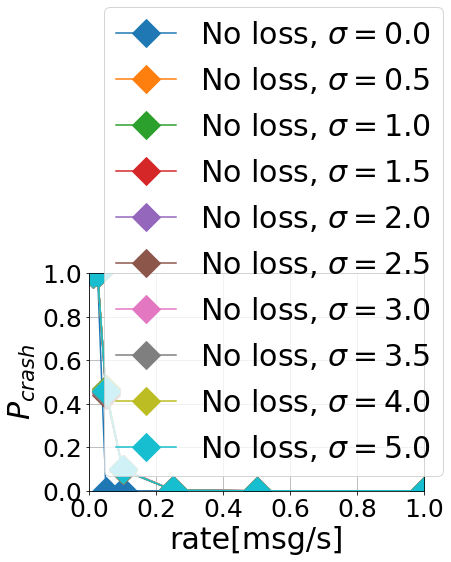

In [4]:
for i in range(len(Errors)):
    nlp0 = d['No loss'][i*len(r):(i+1)*len(r)]
    adp0 = d['ADS-B'][i*len(r):(i+1)*len(r)]
    wip0 = d['Wi-Fi beacons'][i*len(r):(i+1)*len(r)]
    plt.plot(r,nlp0,'D-', label='No loss, $\sigma=%.1f$'%Errors[i], markersize=20)
    #plt.plot(r,adp0,'v-', label='ADS-B, $\sigma=%.1f$'%Errors[i], markersize=20)
    #plt.plot(r,wip0,'p-', label='Wi-Fi, $\sigma=%.1f$'%Errors[i], markersize=20)

plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.xlabel('rate[msg/s]',fontsize=30)
plt.ylabel('$P_{crash}$',fontsize=30)
plt.grid(True)
plt.legend(fontsize=30)
plt.axis([0,1,0,1])
#plt.savefig('results.pdf',dpi=300,bbox_inches='tight')
plt.show()

In [5]:
d,r = read('results_avd.txt')

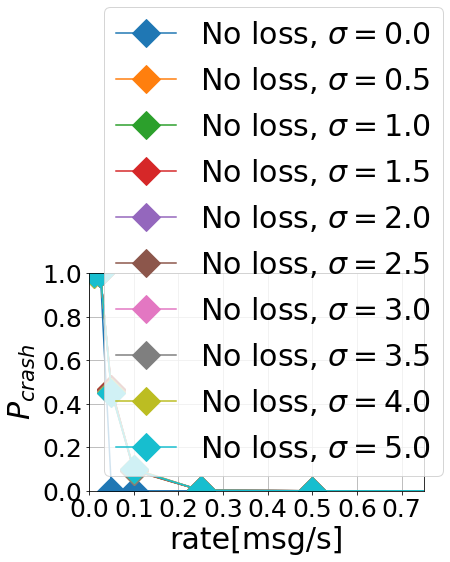

In [6]:
for i in range(len(Errors)):
    nlp0 = d['No loss'][i*len(r):(i+1)*len(r)]
    adp0 = d['ADS-B'][i*len(r):(i+1)*len(r)]
    wip0 = d['Wi-Fi beacons'][i*len(r):(i+1)*len(r)]
    plt.plot(r,nlp0,'D-', label='No loss, $\sigma=%.1f$'%Errors[i], markersize=20)
    #plt.plot(r,adp0,'v-', label='ADS-B, $\sigma=%.1f$'%Errors[i], markersize=20)
    #plt.plot(r,wip0,'p-', label='Wi-Fi, $\sigma=%.1f$'%Errors[i], markersize=20)

plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.xlabel('rate[msg/s]',fontsize=30)
plt.ylabel('$P_{crash}$',fontsize=30)
plt.grid(True)
plt.legend(fontsize=30)
plt.axis([0,0.75,0,1])
#plt.savefig('results.pdf',dpi=300,bbox_inches='tight')
plt.show()

In [7]:
d,r = read('results_sw.txt')

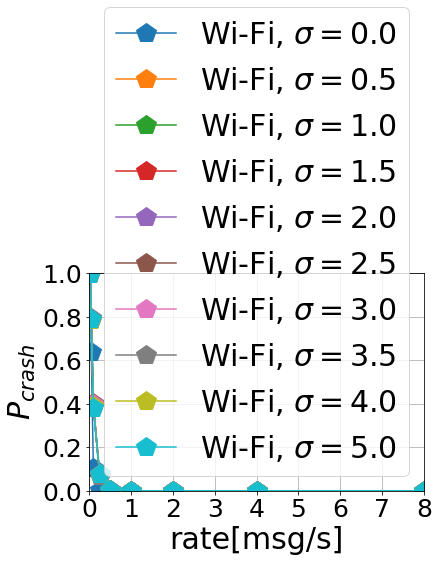

In [8]:
for i in range(len(Errors)):
    nlp0 = d['No loss'][i*len(r):(i+1)*len(r)]
    adp0 = d['ADS-B'][i*len(r):(i+1)*len(r)]
    wip0 = d['Wi-Fi beacons'][i*len(r):(i+1)*len(r)]
    #plt.plot(r,nlp0,'D-', label='No loss, $\sigma=%.1f$'%Errors[i], markersize=20)
    #plt.plot(r,adp0,'v-', label='ADS-B, $\sigma=%.1f$'%Errors[i], markersize=20)
    plt.plot(r,wip0,'p-', label='Wi-Fi, $\sigma=%.1f$'%Errors[i], markersize=20)

plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.xlabel('rate[msg/s]',fontsize=30)
plt.ylabel('$P_{crash}$',fontsize=30)
plt.grid(True)
plt.legend(fontsize=30)
plt.axis([0,8,0,1])
plt.savefig('results_d3.png',dpi=300,bbox_inches='tight')
plt.show()

In [9]:
class Block:
    def __init__(self):
        self.data = []
        self.rate = []
        self.speed = 0
        self.loss = 0
        self.curve = ''
    def __repr__(self):
        s = 'Loss:'+str(self.loss)+'\n'
        s+= 'Speed:'+str(self.speed)+'\n'
        s+= 'Rf: '+self.curve+'\n'
        for r,d in zip(self.rate,self.data):
            s+=str(r)+'\t'+str(d)+'\n'
        return s
        
        
def read_speed(filename):
    f = open(filename)
    raw = f.readlines()
    f.close()
    blocks = []
    
    for line in raw:
        if line == '':
            continue
        if 'Error:' in line:
            blocks.append(Block())
            continue
        if 'Speed:' in line:
            ls = line.split()
            blocks[-1].speed = float(ls[1])
            continue
        if 'Loss:' in line:
            ls = line.split()
            blocks[-1].loss = float(ls[1])
            continue
        if 'No loss' in line or 'ADS-B' in line or 'Wi-Fi' in line:
            blocks[-1].curve = line
            continue
        
        ls = line.split()
        blocks[-1].rate.append(float(ls[0]))
        blocks[-1].data.append(float(ls[1]))
        
            
    return blocks
    
    

In [10]:
blocks = read_speed('results_speed_loss_avoid_last.txt')

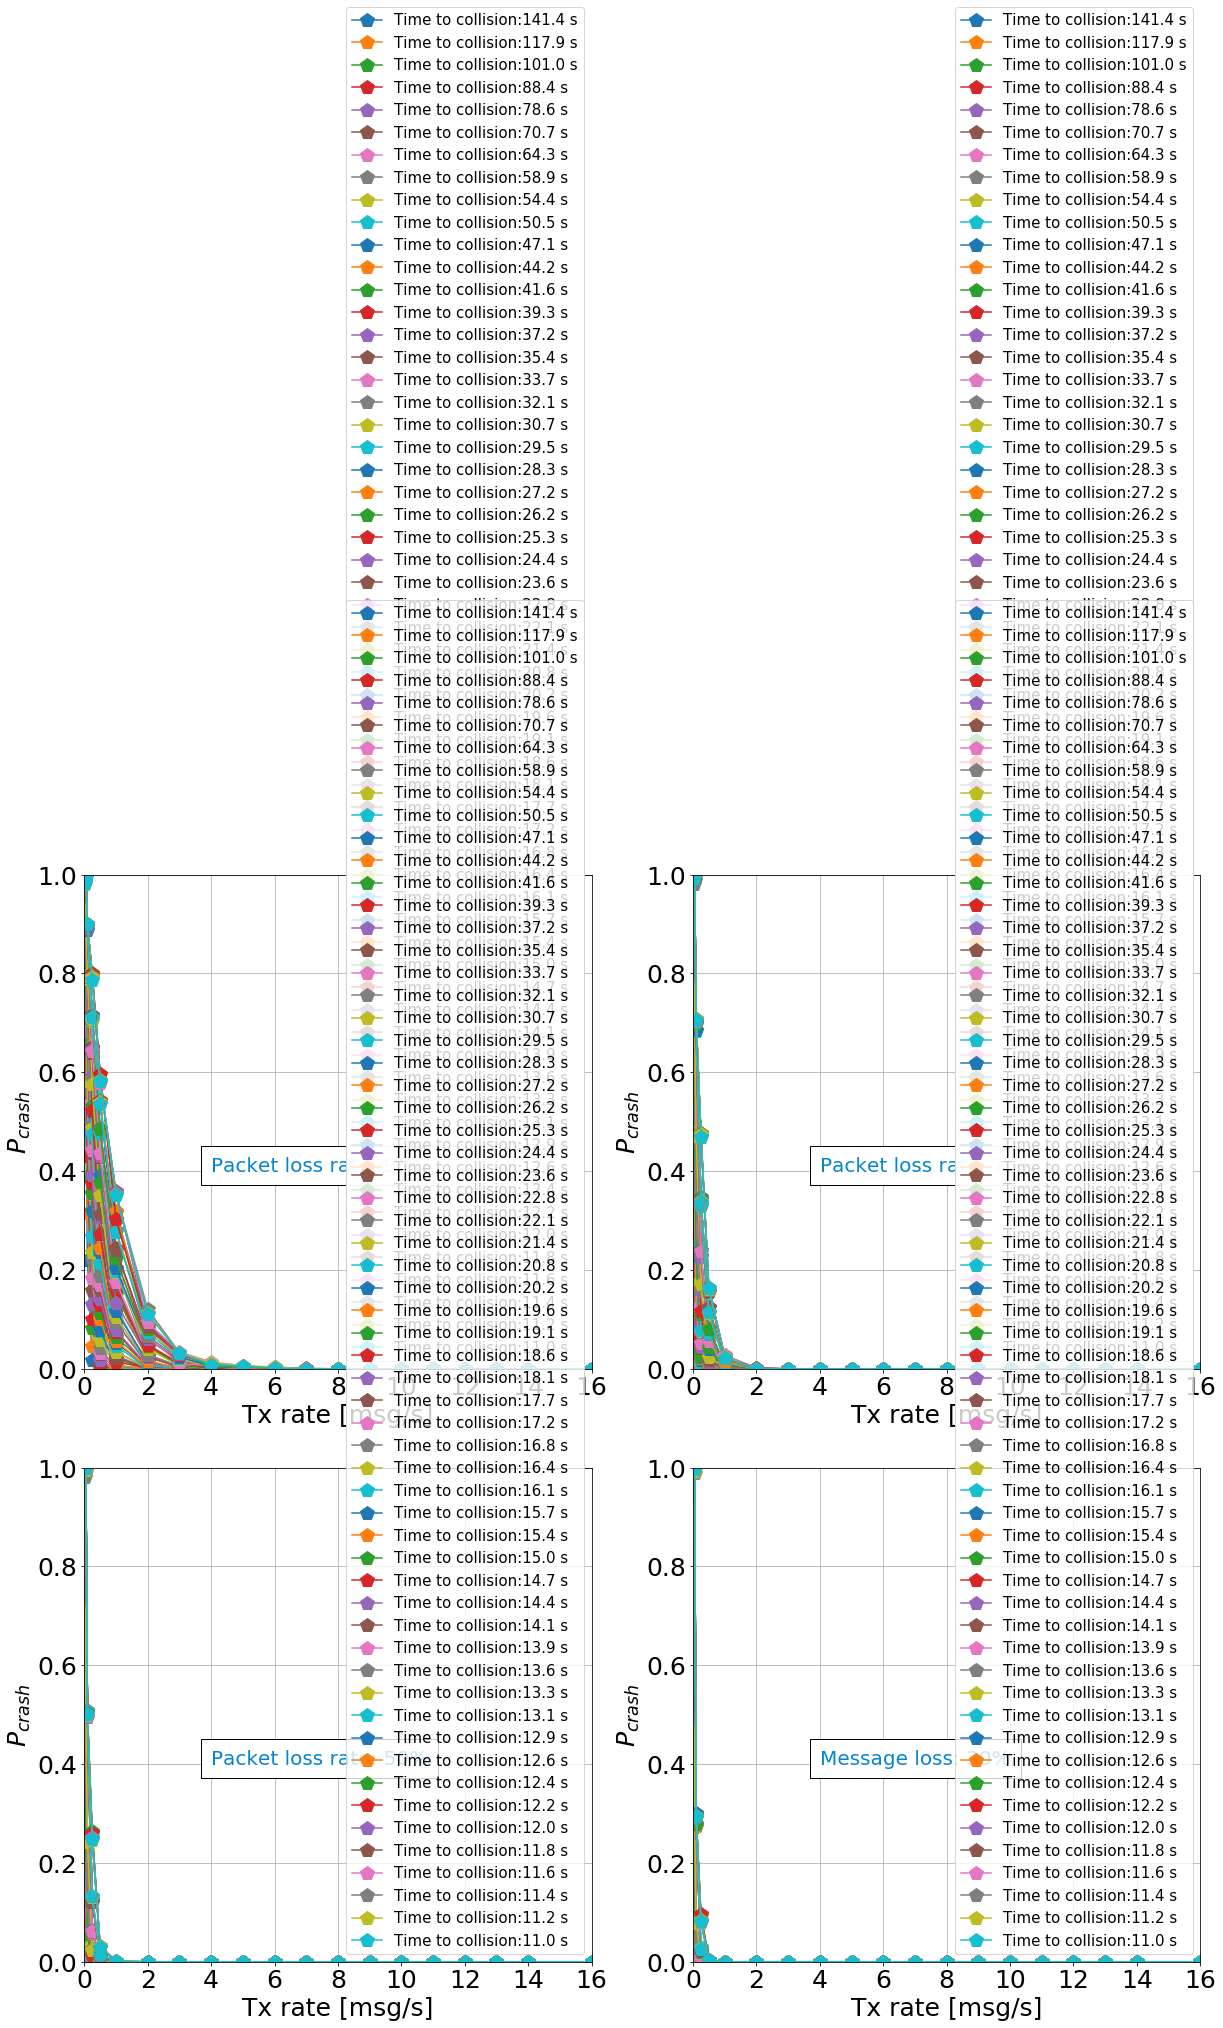

In [11]:
import math

syms = ['p','d','v','o','P','H','X','*','D',"<",">","^","p","D","x"]
plt.rcParams["figure.figsize"] = (20,20)
plt.subplot(221)
si = 0
for b in blocks:
    if b.loss == 100.0:
        ttc = (1000*math.sqrt(2)/2)/b.speed
        plt.plot(b.rate,b.data,syms[si]+'-',label='Time to collision:%.1f s'%(ttc,), markersize=15)
        #si+=1


plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.xlabel('Tx rate [msg/s]',fontsize=25)
plt.ylabel('$P_{crash}$',fontsize=25)
plt.grid(True)
plt.legend(fontsize=15)
plt.axis([0,16,0,1])
plt.text(4,0.4,"Packet loss rate: 90%",fontsize=20, bbox={'facecolor': 'white', 'pad': 10}, color='#0485d1')

plt.subplot(222)
si=0
for b in blocks:
    if b.loss == 300.0:
        ttc = (1000*math.sqrt(2)/2)/b.speed
        plt.plot(b.rate,b.data,syms[si]+'-',label='Time to collision:%.1f s'%(ttc,), markersize=15)
        #si+=1
        
plt.text(4,0.4,"Packet loss rate: 70%",fontsize=20, bbox={'facecolor': 'white', 'pad': 10}, color='#0485d1')
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.xlabel('Tx rate [msg/s]',fontsize=25)
plt.ylabel('$P_{crash}$',fontsize=25)
plt.grid(True)
plt.legend(fontsize=15)
plt.axis([0,16,0,1])

plt.subplot(223)
si=0
for b in blocks:
    if b.loss == 500.0:
        ttc = (1000*math.sqrt(2)/2)/b.speed
        plt.plot(b.rate,b.data,syms[si]+'-',label='Time to collision:%.1f s'%(ttc,), markersize=15)
        #si+=1
        
plt.text(4,0.4,"Packet loss rate: 50%",fontsize=20, bbox={'facecolor': 'white',  'pad': 10}, color='#0485d1')
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.xlabel('Tx rate [msg/s]',fontsize=25)
plt.ylabel('$P_{crash}$',fontsize=25)
plt.grid(True)
plt.legend(fontsize=15)
plt.axis([0,16,0,1])


plt.subplot(224)
si=0
for b in blocks:
    if b.loss == 700.0:
        ttc = (1000*math.sqrt(2)/2)/b.speed
        
        plt.plot(b.rate,b.data,syms[si]+'-',label='Time to collision:%.1f s'%(ttc,), markersize=15)
        #si+=1
        
plt.text(4,0.4,"Message loss: 30%",fontsize=20, bbox={'facecolor': 'white',  'pad': 10}, color='#0485d1')

plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.xlabel('Tx rate [msg/s]',fontsize=25)
plt.ylabel('$P_{crash}$',fontsize=25)
plt.grid(True)
plt.legend(fontsize=15)
plt.axis([0,16,0,1])

plt.savefig('results_speed_loss.pdf',dpi=300,bbox_inches='tight')
plt.show()

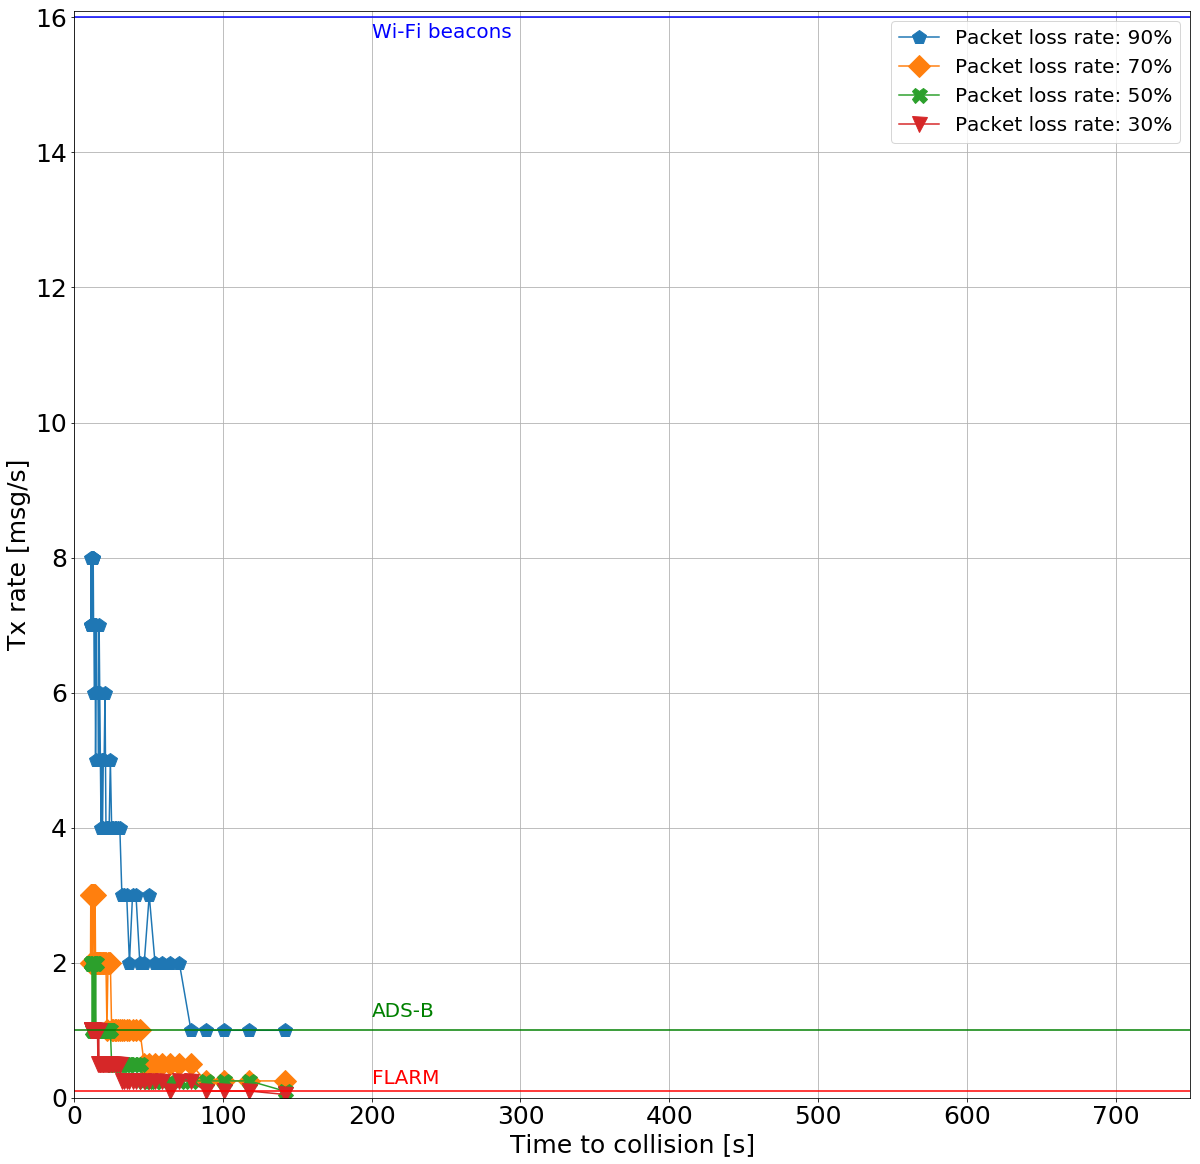

In [12]:
rates90 = []
rates70 = []
rates50 = []
rates30 = []
ttc = []
for b in blocks:
    if b.loss == 100.0:
        ttc.append((1000*math.sqrt(2)/2)/b.speed)
        for r,d in zip(b.rate,b.data):
            if d < 0.00001:
                rates90.append(r)
                break
    if b.loss == 300.0:
        #ttc.append((1000*math.sqrt(2)/2)/b.speed)
        for r,d in zip(b.rate,b.data):
            if d < 0.00001:
                rates70.append(r)
                break
    if b.loss == 500.0:
        #ttc.append((1000*math.sqrt(2)/2)/b.speed)
        for r,d in zip(b.rate,b.data):
            if d < 0.00001:
                rates50.append(r)
                break
    if b.loss == 700.0:
        #ttc.append((1000*math.sqrt(2)/2)/b.speed)
        for r,d in zip(b.rate,b.data):
            if d < 0.00001:
                rates30.append(r)
                break        

fig, ax = plt.subplots()
plt.plot(ttc,rates90,'p-',label="Packet loss rate: 90%", markersize = 15)
plt.plot(ttc,rates70,'D-',label="Packet loss rate: 70%", markersize = 15)
plt.plot(ttc,rates50,'X-',label="Packet loss rate: 50%", markersize = 15)
plt.plot(ttc,rates30,'v-',label="Packet loss rate: 30%", markersize = 15)
ax.axhline(y=0.1, xmin=0.0, xmax=1.0, color='r')
plt.text(200,0.2,"FLARM",fontsize=20, color='red')
ax.axhline(y=1.0, xmin=0.0, xmax=1.0, color='g')
plt.text(200,1.2,"ADS-B",fontsize=20, color='green')
ax.axhline(y=16, xmin=0.0, xmax=1.0, color='b')
plt.text(200,15.7,"Wi-Fi beacons",fontsize=20, color='blue')
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.xlabel('Time to collision [s]',fontsize=25)
plt.ylabel('Tx rate [msg/s]',fontsize=25)
plt.axis([0,750,0,16.1])
plt.legend(fontsize=20)
plt.grid(True)
plt.savefig('rate_vs_ttc.pdf',dpi=300,bbox_inches='tight')
plt.show()